# dataset Wine - PCA y Regresión Logística

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

### Cargo el dataset y lo analizo

In [2]:
from sklearn.datasets import load_wine
data = load_wine()

In [3]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print('data.DESCR = ', data.DESCR)

data.DESCR =  .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0

In [5]:
print('data.feature_names = ', data.feature_names)
print('len(data.feature_names) = ', len(data.feature_names))
print('data.data = ',data.data)
print('data.data.shape = ',data.data.shape)
print('data.target_names = ', data.target_names)
print('data.target = ', data.target)
print('data.target.shape = ', data.target.shape)
print('data.frame = ', data.frame)

data.feature_names =  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
len(data.feature_names) =  13
data.data =  [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
data.data.shape =  (178, 13)
data.target_names =  ['class_0' 'class_1' 'class_2']
data.target =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

El dataset consiste en 178 filas con 13 columnas. En data.data se encuentran las variables independientes (features o características) y en data.target se encuentran las clases de cada vino: clase 0, 1 y 2.

In [6]:
print('len class_0 = ',sum(data.target == 0))
print('len class_1 = ',sum(data.target == 1))
print('len class_2 = ',sum(data.target == 2))
print('total shape = ',data.data.shape)

len class_0 =  59
len class_1 =  71
len class_2 =  48
total shape =  (178, 13)


## Limpieza de datos

Pongo los datos en DataFrames X e Y, con sus nombres.

In [7]:
X = pd.DataFrame(data.data, columns = data.feature_names)
print(X.shape)
Y = pd.Series(data.target)
print(Y.shape)

(178, 13)
(178,)


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [9]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

En X no hay valores nulos. 

In [10]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 178 entries, 0 to 177
Series name: None
Non-Null Count  Dtype
--------------  -----
178 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


In [11]:
Y.isnull().sum()

np.int64(0)

En Y tampoco hay valores nulos.

In [12]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [13]:
X.duplicated().sum()

np.int64(0)

No hay valores duplicados. En principio pareciera que está todo OK. 
* No hay missing values (NaN).
* No hay valores repetidos
* No hay valores fuera de rango esperado (<=0).

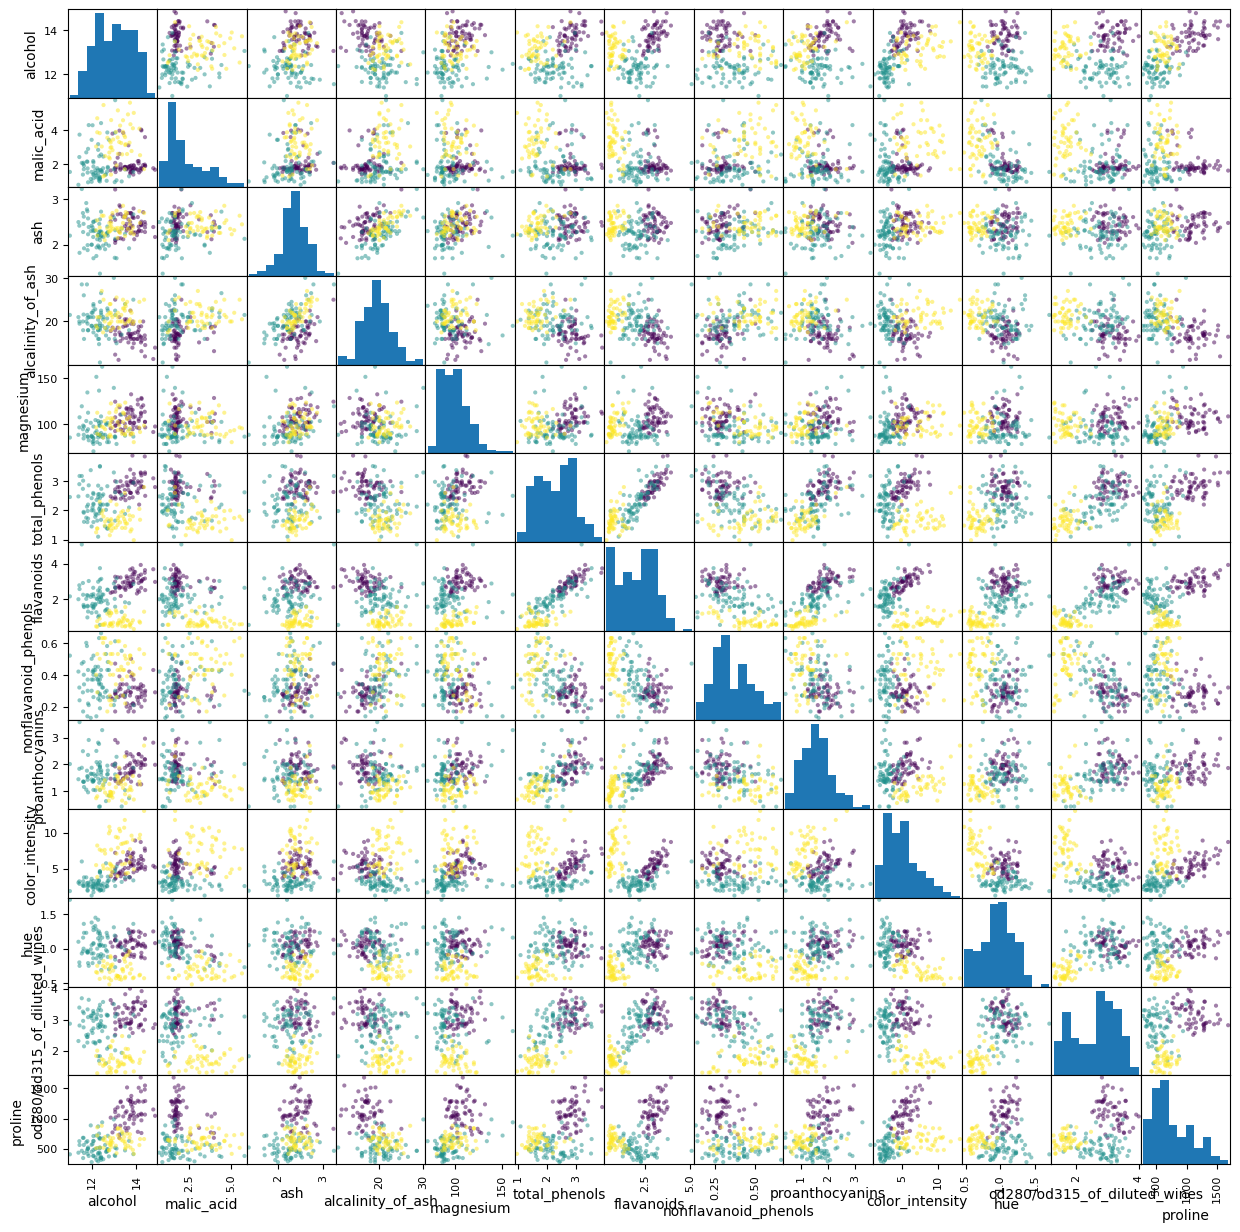

In [14]:
pd.plotting.scatter_matrix(X,c=Y,figsize = (15,15))
plt.show()

### Reducción dimensional con PCA

Antes de aplicar PCA, primero aplico StandardScaler. Es importante escalear porque con PCA son importantes las distancias, entonces es importante equipararlas en las distintas direcciones. 
Generalmente aplica el escaleo cuando se aplican algoritmos que utilizan distancias y donde las diferencias de escala en cada dirección puede producir que el algoritmo tenga un mal funcionamiento.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Ahora aplico PCA.

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled,Y)

In [19]:
X_pca.shape

(178, 13)

In [20]:
print('explained ratio =',pca.explained_variance_ratio_.round(3))

explained ratio = [0.362 0.192 0.111 0.071 0.066 0.049 0.042 0.027 0.022 0.019 0.017 0.013
 0.008]


[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


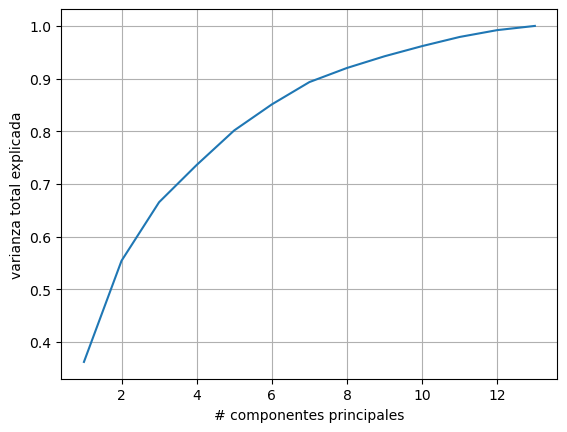

In [21]:
EVR = pca.explained_variance_ratio_
print(EVR.cumsum())
plt.plot(range(1,len(EVR)+1),EVR.cumsum())
plt.xlabel('# componentes principales')
plt.ylabel('varianza total explicada')
plt.grid()
plt.show()

Con las primeras 2 componentes se explica alrededor del 55% de la varianza. Vamos a usar estas dos primeras componentes y las graficamos.

Con 7 componentes se puede explicar alrededor del 90% de la varianza.

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled,data.target)
X_pca.shape

(178, 2)

In [23]:
print('varianza explicada = ',(pca.explained_variance_ratio_.sum()*100).round(2),'%')

varianza explicada =  55.41 %


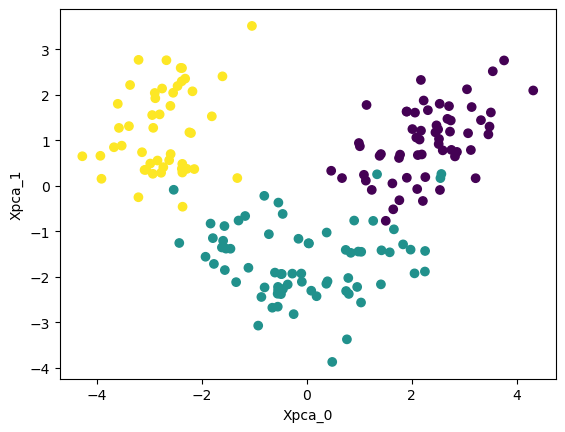

In [24]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=Y)
plt.xlabel('Xpca_0')
plt.ylabel('Xpca_1')
plt.show()

Mediante estas dos componentes es posible separar bastante bien las clases. Si se agregaran más componentes se puede mejorar aún más.

Ahora se podria aplicar algún algoritmo de clasificación para identificar las clases, usando sólo estas dos componentes principales.

## Aplico un algoritmo de clasificación: Regresion logística

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
model.fit(X_pca,Y)

LogisticRegression()

In [27]:
Y_pred = model.predict(X_pca)
model.score(X_pca,Y)

0.9662921348314607

In [28]:
print('cantidad de valores predichos erroneamente = ',(Y != Y_pred).sum())
print('porcentaje de aciertos = ',((Y == Y_pred).sum() / len(Y) *100).round(2),'%')


cantidad de valores predichos erroneamente =  6
porcentaje de aciertos =  96.63 %


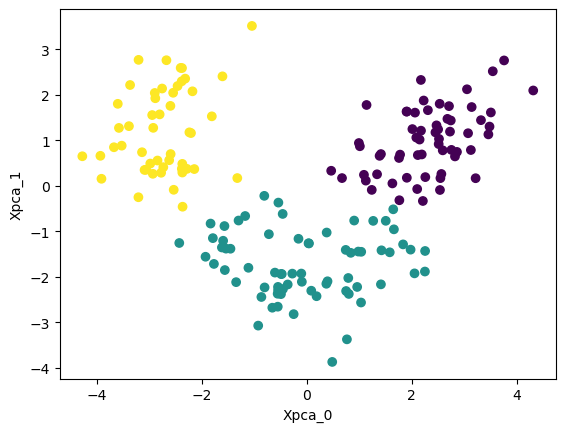

In [29]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=Y_pred)
plt.xlabel('Xpca_0')
plt.ylabel('Xpca_1')
plt.show()

Ahora uso Cross Validation para estimar el score con mayor exactitud. 

In [41]:
from sklearn.model_selection import cross_val_score
# create model
model = LogisticRegression()
# evaluate model con cross validation
scores = cross_val_score(model, X_pca, Y, scoring='accuracy', cv=10)
print('Scores', scores)
# report performance
print('Mean score: ', scores.mean().round(4), ' - Std score: ', scores.std().round(4) )

Scores [0.88888889 1.         0.94444444 0.88888889 1.         0.94444444
 0.94444444 1.         0.94117647 1.        ]
Mean accuracy:  0.9552  - Std accuracy:  0.0417


Entonces el score promedio es de 0.955

## Conclusiones

* Se hizo un breve EDA del dataset Wine. No fue necesario hacer limpieza de datos ya que el dataset está curado.
* Se aplicó PCA para reducir la cantidad de variables del problema a 2.
* Con estas 2 variables se aplicó un algoritmo de clasificación Regresión Logística y se logró predecir correctamente el 95,6% de los datos.